In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import pandas as pd

from src.evaluation.experiments.MNRLoss.in_distribution_all_data.research_questions_1a import \
    get_folder_and_table_information
from src.evaluation.experiments.utils import pandas_df_to_latex

pd.set_option('display.width', 1000)  # Increase the total width of the display
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_colwidth', None)  # Do not truncate column contents
pd.set_option('display.expand_frame_repr', False)



sweep_dir = "/home/christian/PycharmProjects/ethikchat-experiment-argument-classification/experiments_outputs/e3xgfhuq/amber-sweep-20"
get_folder_and_table_information(sweep_dir)

fragrant-sweep-16
 ├── confidence_threshold_metrics
  ├── cosine_multi_argument_classification_exact_match.csv
       Confidence  Accuracy  Queries_Above_Threshold
    0         0.7  0.045564                       10

  ├── cosine_multi_argument_classification_partial_match_noisy.csv
       Confidence  Accuracy  Queries_Above_Threshold
    0         0.7  0.031453                      893

  ├── cosine_single_argument_classification_merged_queries.csv
       Confidence  Accuracy  Queries_Above_Threshold
    0         0.7  0.287528                     1310

  ├── cosine_multi_argument_classification_true_partial_match_multi_label.csv
       Confidence  Accuracy  Queries_Above_Threshold
    0         0.7       0.0                       10

  ├── cosine_multi_argument_classification_partial_match_multi_label.csv
       Confidence  Accuracy  Queries_Above_Threshold
    0         0.7       0.0                       10

  ├── cosine_single_argument_classification_noisy_queries.csv
       Conf

In [39]:
from src.evaluation.experiments.utils import model_name_to_short_name
from src.evaluation.experiments.MNRLoss.in_distribution_all_data.research_questions_1a import get_overall_sweep_results
import os
import glob


# Set the base directory for results
RESULTS_DIR = "/home/christian/PycharmProjects/ethikchat-experiment-argument-classification/experiments_outputs/5qgtbfrb"  # Adjust this to your results directory

RESULTS_DIR_2 = "/home/christian/PycharmProjects/ethikchat-experiment-argument-classification/experiments_outputs/e3xgfhuq"

# List all run directories
run_dirs = glob.glob(os.path.join(RESULTS_DIR, "*"))
run_dirs_2 = glob.glob(os.path.join(RESULTS_DIR_2, "*"))

run_dirs = [d for d in run_dirs if os.path.isdir(d)]
run_dirs_2 = [d for d in run_dirs_2 if os.path.isdir(d)]

run_dirs.extend(run_dirs_2)
print(f"Found {len(run_dirs)} experimental runs")

results_df = get_overall_sweep_results(run_dirs, model_name_to_short_name)

# Sort by accuracy@1 (assuming this is the primary metric of interest)
if 'accuracy@1.0' in results_df.columns:
    results_df = results_df.sort_values(by='accuracy@1.0', ascending=False)  # Display the top models

# Group by model_name and get the run with highest accuracy@1 in each group
best_runs = results_df.sort_values('Acc@1', ascending=False)
best_runs.head(5)

Found 79 experimental runs


,model_name,add_discussion_info,context_length,learning_rate,batch_size,num_epochs,warmup_ratio,run_dir,Acc@1,Acc@3,Acc@5,Acc@7,Prec@1,Prec@3,Prec@5,Prec@7,Rec@1,Rec@3,Rec@5,Rec@7
40,GBERT Large-aari,False,0,0.00003,256,10,0.15,electric-sweep-38,0.942446,0.976019,0.980815,0.985612,0.942446,0.945643,0.946283,0.944844,0.934053,0.966427,0.970024,0.974820
17,GBERT Large-telekom,True,0,0.00002,256,8,0.10,fragrant-sweep-16,0.937650,0.954436,0.959233,0.959233,0.937650,0.933653,0.926619,0.924974,0.929257,0.946043,0.950839,0.950839
20,GBERT Large-telekom,False,0,0.00002,256,10,0.10,feasible-sweep-24,0.932854,0.959233,0.966427,0.971223,0.932854,0.925659,0.920384,0.918808,0.925659,0.949640,0.955635,0.961631
6,XLMRoberta-EN-DE,False,0,0.00002,128,12,0.15,jolly-sweep-10,0.928058,0.952038,0.964029,0.971223,0.928058,0.909672,0.909353,0.906817,0.919664,0.943645,0.955635,0.962830
24,GBERT Large-aari,False,0,0.00002,128,12,0.15,jumping-sweep-36,0.918465,0.959233,0.964029,0.968825,0.918465,0.911271,0.909353,0.903734,0.913669,0.953237,0.958034,0.960432


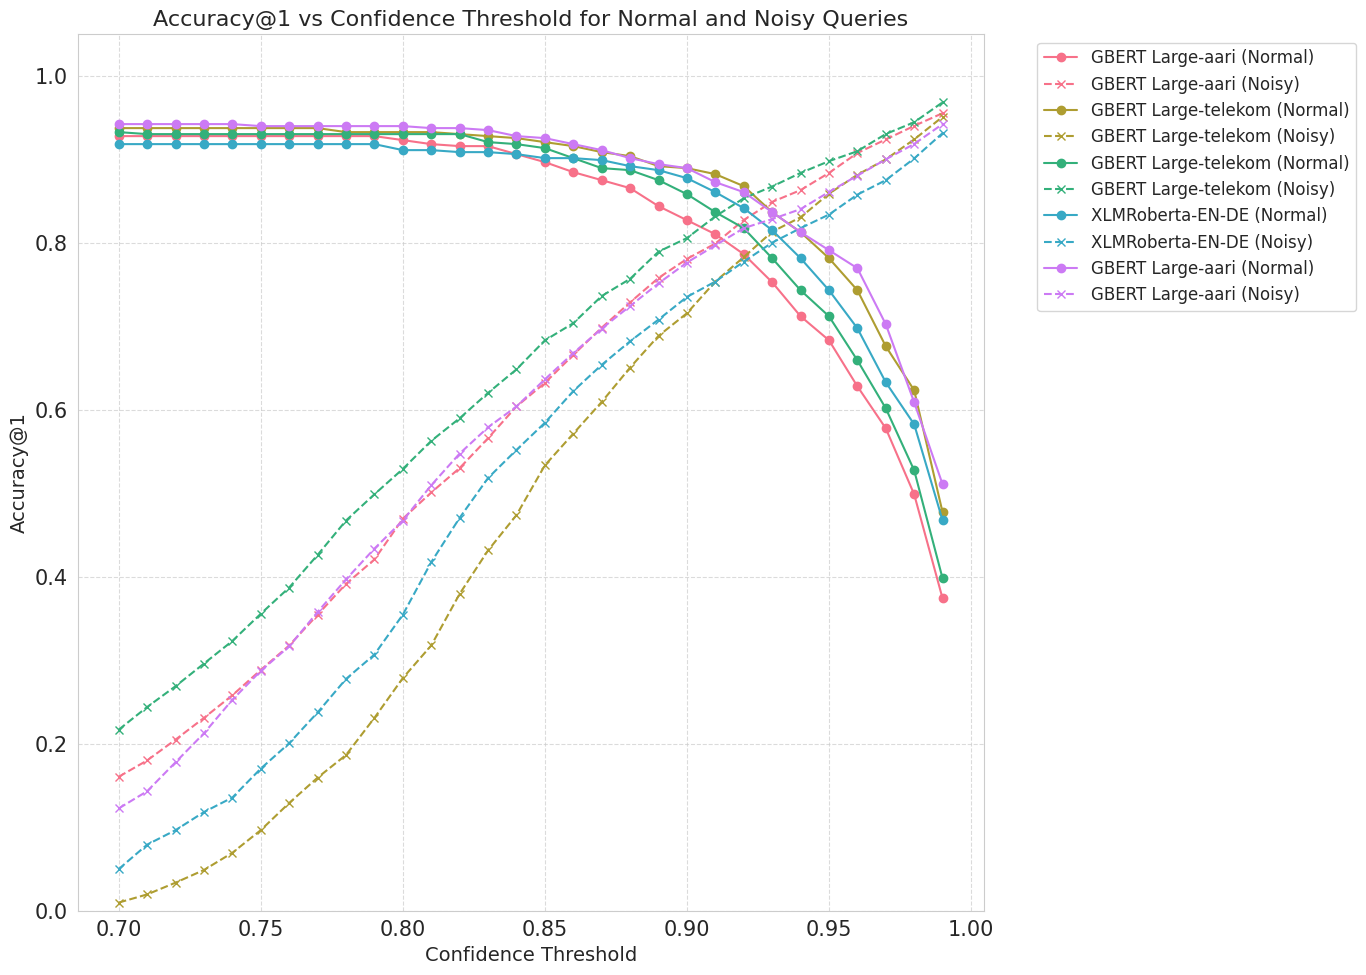

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


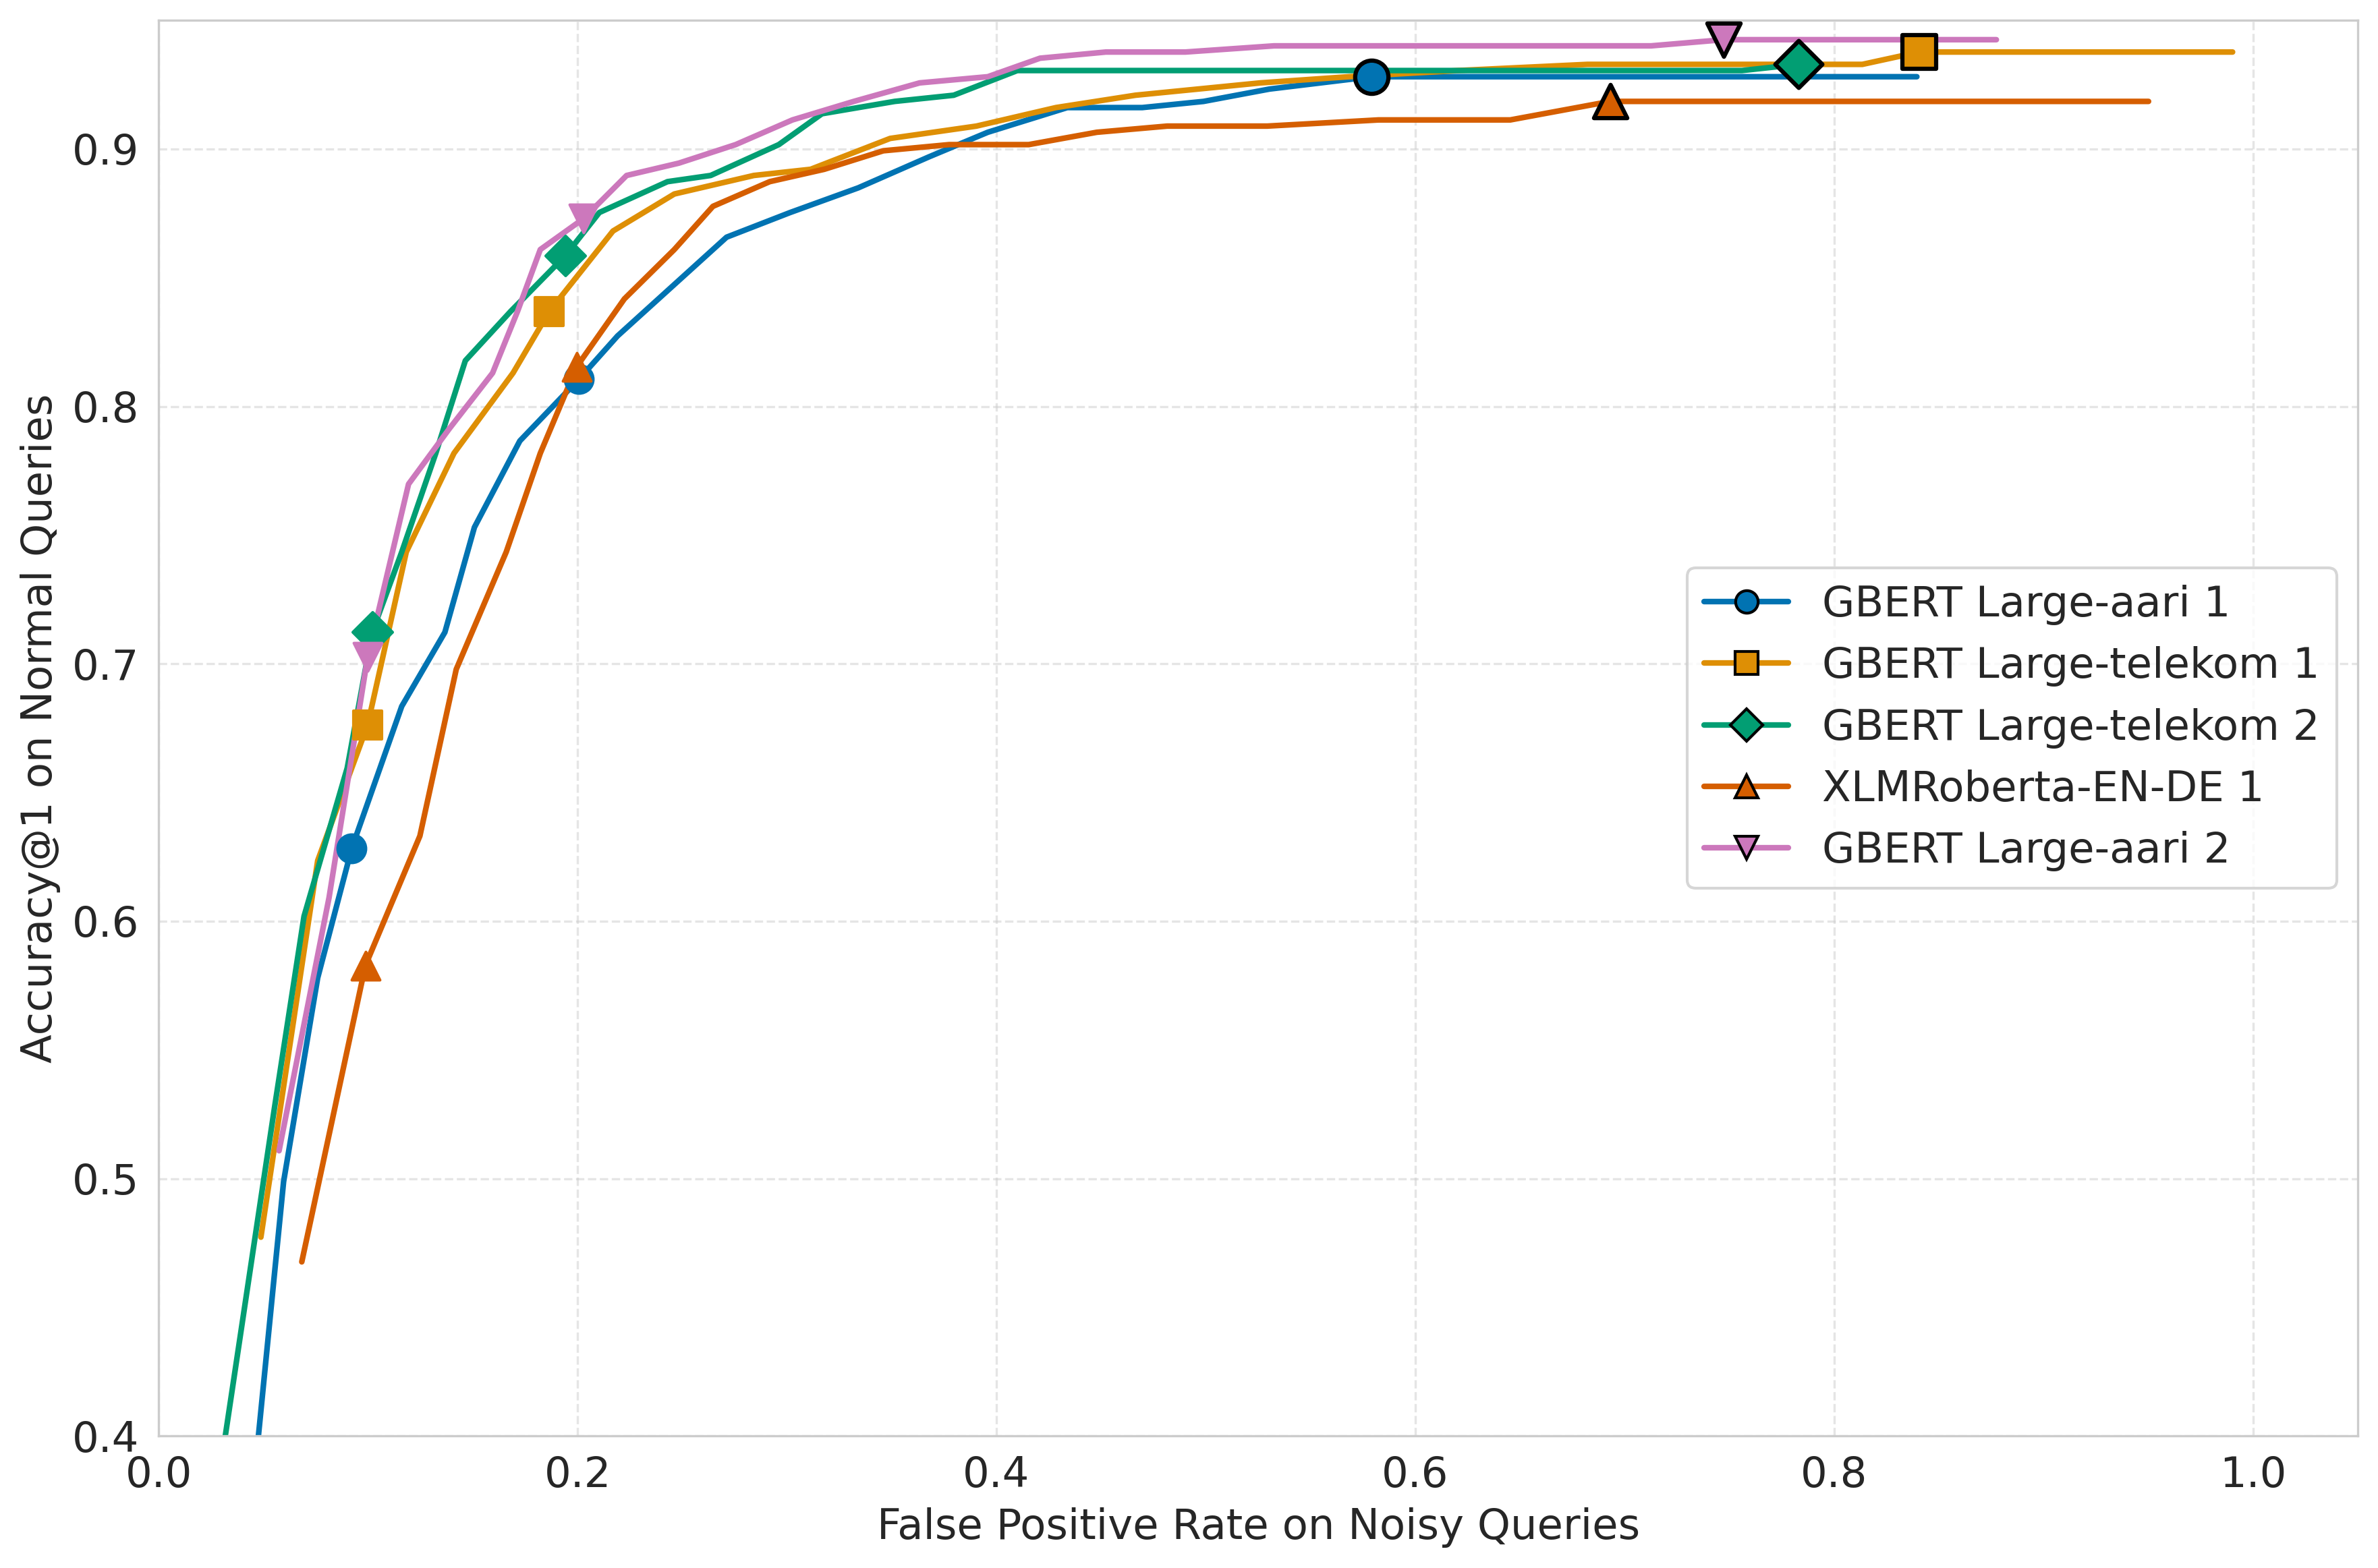

,model_name,add_discussion_info,context_length,learning_rate,batch_size,num_epochs,warmup_ratio,run_dir,Acc@1,Acc@3,Acc@5,Acc@7,Prec@1,Prec@3,Prec@5,Prec@7,Rec@1,Rec@3,Rec@5,Rec@7
40,GBERT Large-aari,False,0,0.00003,256,10,0.15,electric-sweep-38,0.942446,0.976019,0.980815,0.985612,0.942446,0.945643,0.946283,0.944844,0.934053,0.966427,0.970024,0.974820
17,GBERT Large-telekom,True,0,0.00002,256,8,0.10,fragrant-sweep-16,0.937650,0.954436,0.959233,0.959233,0.937650,0.933653,0.926619,0.924974,0.929257,0.946043,0.950839,0.950839
20,GBERT Large-telekom,False,0,0.00002,256,10,0.10,feasible-sweep-24,0.932854,0.959233,0.966427,0.971223,0.932854,0.925659,0.920384,0.918808,0.925659,0.949640,0.955635,0.961631
6,XLMRoberta-EN-DE,False,0,0.00002,128,12,0.15,jolly-sweep-10,0.928058,0.952038,0.964029,0.971223,0.928058,0.909672,0.909353,0.906817,0.919664,0.943645,0.955635,0.962830
24,GBERT Large-aari,False,0,0.00002,128,12,0.15,jumping-sweep-36,0.918465,0.959233,0.964029,0.968825,0.918465,0.911271,0.909353,0.903734,0.913669,0.953237,0.958034,0.960432


In [57]:
from src.evaluation.experiments.MNRLoss.in_distribution_all_data.research_question_1b import \
    plot_confidence_threshold_performance, calculate_fp_rates, plot_threshold_tradeoff

top_models_df = best_runs.head(5)
top_runs =top_models_df["run_dir"].to_list()
top_models_run_dirs = [run_dir for run_dir in run_dirs if run_dir.split("/")[-1] in top_runs]


# Run the functions
plot_confidence_threshold_performance(top_models_run_dirs, top_models_df)

# Calculate and display false positive rates
fp_rates = calculate_fp_rates(top_models_run_dirs, top_models_df)
pivoted_fp = fp_rates.pivot_table(index='threshold', columns='model', values='fp_rate')

# Run the tradeoff plot
plot_threshold_tradeoff(top_models_run_dirs, top_models_df)
top_models_df

In [54]:
from src.evaluation.experiments.MNRLoss.in_distribution_all_data.research_question_1b import summary_table

table = summary_table(top_models_run_dirs,
                          top_models_df["model_name"],
                          fp_targets=[0.10, 0.20])

print(
    pandas_df_to_latex(table, float_format="{:.2f}".format),
)
# or table.to_csv("threshold_summary.csv", index=False)


\begin{tabularx}{\textwidth}{CCCCCCCC}
\toprule
model & acc@10% & thr@10% & acc@20% & thr@20% & max_acc & fp@max & thr@max \\
\midrule
GBERT Large-aari 1 & 0.63 & 0.96 & 0.81 & 0.91 & 0.93 & 0.58 & 0.79 \\
GBERT Large-telekom 1 & 0.68 & 0.97 & 0.84 & 0.93 & 0.94 & 0.84 & 0.77 \\
GBERT Large-telekom 2 & 0.71 & 0.95 & 0.86 & 0.90 & 0.93 & 0.78 & 0.70 \\
XLMRoberta-EN-DE 1 & 0.58 & 0.98 & 0.82 & 0.93 & 0.92 & 0.69 & 0.79 \\
GBERT Large-aari 2 & 0.70 & 0.97 & 0.87 & 0.91 & 0.94 & 0.75 & 0.74 \\
\bottomrule
\end{tabularx}



In [10]:
from src.evaluation.experiments.MNRLoss.in_distribution_all_data.research_question_1b import \
    create_threshold_metrics_table

# Generate the table with selected thresholds
# You can specify thresholds or let the function choose strategic ones
threshold_metrics = create_threshold_metrics_table(top_models_run_dirs, top_models_df)

# Display the table
threshold_metrics

,model,threshold,f1_score,false_positive_rate,noisy_queries,normal_accuracy,normal_queries,precision,recall
0,GBERT Large-aari,0.70,0.2737,0.8395,774.0,0.9281,417.0,0.1605,0.9281
1,GBERT Large-aari,0.90,0.8035,0.2191,202.0,0.8273,357.0,0.7809,0.8273
2,GBERT Large-aari,0.99,0.5377,0.0445,41.0,0.3741,157.0,0.9555,0.3741
3,GBERT Large-telekom,0.70,0.0193,0.9902,913.0,0.9376,417.0,0.0098,0.9376
4,GBERT Large-telekom,0.90,0.7933,0.2842,262.0,0.8897,389.0,0.7158,0.8897
5,GBERT Large-telekom,0.99,0.6356,0.0488,45.0,0.4772,202.0,0.9512,0.4772
6,XLMRoberta-EN-DE,0.70,0.0946,0.9501,876.0,0.9185,417.0,0.0499,0.9185
7,XLMRoberta-EN-DE,0.90,0.8002,0.2646,244.0,0.8777,384.0,0.7354,0.8777
8,XLMRoberta-EN-DE,0.99,0.6227,0.0683,63.0,0.4676,199.0,0.9317,0.4676


In [11]:
from src.evaluation.experiments.MNRLoss.in_distribution_all_data.research_question_1b import find_optimal_thresholds

# Find optimal thresholds
optimal_thresholds = find_optimal_thresholds(top_models_run_dirs, top_models_df)


print(
    pandas_df_to_latex(optimal_thresholds, float_format="{:.2f}".format),
)

\begin{tabularx}{\textwidth}{CCCCCCCCCCCC}
\toprule
model & max_f1_threshold & max_f1_value & max_f1_normal_acc & max_f1_fp_rate & max_balanced_acc_threshold & max_balanced_acc_value & max_balanced_acc_normal_acc & max_balanced_acc_fp_rate & max_acc_low_fp_threshold & max_acc_low_fp_value & max_acc_low_fp_fp_rate \\
\midrule
GBERT Large-aari & 0.92 & 0.81 & 0.79 & 0.17 & 0.92 & 0.81 & 0.79 & 0.17 & 0.99 & 0.37 & 0.04 \\
GBERT Large-telekom & 0.93 & 0.83 & 0.84 & 0.19 & 0.92 & 0.83 & 0.87 & 0.22 & 0.99 & 0.48 & 0.05 \\
GBERT Large-telekom & 0.92 & 0.84 & 0.82 & 0.15 & 0.92 & 0.84 & 0.82 & 0.15 & 0.99 & 0.40 & 0.03 \\
XLMRoberta-EN-DE & 0.92 & 0.81 & 0.84 & 0.22 & 0.92 & 0.81 & 0.84 & 0.22 & NaN & N/A & N/A \\
GBERT Large-aari & 0.92 & 0.84 & 0.86 & 0.18 & 0.92 & 0.84 & 0.86 & 0.18 & NaN & N/A & N/A \\
\bottomrule
\end{tabularx}

